<a href="https://colab.research.google.com/github/YonahJ/SCI/blob/main/EM3_week2_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Webscraping functions
```



In [ ]:
## First we import the module necessary to open URLs (basically websites)
from urllib.request import urlopen

In [ ]:
## Assign a variable to a website we want to open
url = "http://olympus.realpython.org/profiles"

In [ ]:
## Open the page
page = urlopen(url)
print(page)

In [ ]:
## read the html page
html_bytes = page.read()
print(html_bytes)

## decode the page in standard characters unicode standard or utf-8
html = html_bytes.decode("utf-8")

b'<html>\n<head>\n<title>All Profiles</title>\n</head>\n<body bgcolor="yellow">\n<center>\n<br><br>\n<h1>All Profiles:</h1>\n<br><br>\n<h2>\n<a href="/profiles/aphrodite">Aphrodite</a>\n<br><br>\n<a href="/profiles/poseidon">Poseidon</a>\n<br><br>\n<a href="/profiles/dionysus">Dionysus</a>\n</h2>\n</center>\n</body>\n</html>\n'


In [ ]:
## print the content of a page
print(html)

<html>
<head>
<title>All Profiles</title>
</head>
<body bgcolor="yellow">
<center>
<br><br>
<h1>All Profiles:</h1>
<br><br>
<h2>
<a href="/profiles/aphrodite">Aphrodite</a>
<br><br>
<a href="/profiles/poseidon">Poseidon</a>
<br><br>
<a href="/profiles/dionysus">Dionysus</a>
</h2>
</center>
</body>
</html>



In [ ]:
## Use a HTML parser (HyperText Markup Language) to read the webside content
## BeautifulSoup is a HTML parser

## First we import it
from bs4 import BeautifulSoup


## Now lets create a 'soup' to read the webpage
url = "http://olympus.realpython.org/profiles"
page = urlopen(url)
html = page.read().decode("utf-8")

## This creates a BeautifulObject, which we can navigate with custom functions
soup = BeautifulSoup(html, "html.parser")

## For example
## Check the content of the BS object
print("RAW SOUP:")
print(soup)
print('\n')


## The function get_text() gets rid of all HTML tags - for display
print("The function get_text() gets rid of all HTML tags - for display")
print("SOUP TEXT:")
print(soup.get_text())
print('\n')

RAW SOUP:
<html>
<head>
<title>All Profiles</title>
</head>
<body bgcolor="yellow">
<center>
<br/><br/>
<h1>All Profiles:</h1>
<br/><br/>
<h2>
<a href="/profiles/aphrodite">Aphrodite</a>
<br/><br/>
<a href="/profiles/poseidon">Poseidon</a>
<br/><br/>
<a href="/profiles/dionysus">Dionysus</a>
</h2>
</center>
</body>
</html>



The function get_text() gets rid of all HTML tags - for display
SOUP TEXT:


All Profiles




All Profiles:


Aphrodite

Poseidon

Dionysus









In [ ]:
## Let's print again the content of the soup
## Check the hyperlinks within the page, i.e., the profiles, have the tag <a href>

## Check the content of the BS object
print("RAW SOUP:")
print(soup)
print('\n')

RAW SOUP:
<html>
<head>
<title>All Profiles</title>
</head>
<body bgcolor="yellow">
<center>
<br/><br/>
<h1>All Profiles:</h1>
<br/><br/>
<h2>
<a href="/profiles/aphrodite">Aphrodite</a>
<br/><br/>
<a href="/profiles/poseidon">Poseidon</a>
<br/><br/>
<a href="/profiles/dionysus">Dionysus</a>
</h2>
</center>
</body>
</html>





In [ ]:
## Let's access those links!
## First lets find all elements of the page with the tag 'a'
for element in soup.find_all("a"):
  print(element)


<a href="/profiles/aphrodite">Aphrodite</a>
<a href="/profiles/poseidon">Poseidon</a>
<a href="/profiles/dionysus">Dionysus</a>


In [ ]:
## To access the TEXT HERE contained nested in the brackets
## <. > TEXT HERE <. >
## use .contents

for element in soup.find_all("a"):
  print(element.contents)

['Aphrodite']
['Poseidon']
['Dionysus']


In [ ]:
## We can also acess the sub_url nested in the tag 'a', this is the href
for element in soup.find_all("a"):
  print(element["href"])


/profiles/aphrodite
/profiles/poseidon
/profiles/dionysus


In [ ]:
## Putting it together we can obtain the links to the suburls

base_url = "http://olympus.realpython.org"
for link in soup.find_all("a"):
    link_url = base_url + link["href"]
    print(link_url)


http://olympus.realpython.org/profiles/aphrodite
http://olympus.realpython.org/profiles/poseidon
http://olympus.realpython.org/profiles/dionysus


In [ ]:
## Lets now look into the content of one of these links
## using the same procedure

url_aphrodite = "http://olympus.realpython.org/profiles/aphrodite"
page = urlopen(url_aphrodite)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

print(soup)

<html>
<head>
<title>Profile: Aphrodite</title>
</head>
<body bgcolor="yellow">
<center>
<br/><br/>
<img src="/static/aphrodite.gif"/>
<h2>Name: Aphrodite</h2>
<br/><br/>
Favorite animal: Dove
<br/><br/>
Favorite color: Red
<br/><br/>
Hometown: Mount Olympus
</center>
</body>
</html>



In [ ]:
## Find the information within the tags

title = soup.find("title")
image = soup.find("img")
name = soup.find("h2")

print(title)
print(image)
print(name)

<title>Profile: Aphrodite</title>
<img src="/static/aphrodite.gif"/>
<h2>Name: Aphrodite</h2>


In [ ]:
## We can print the text using the function string

print(title.string)
print(name.string)

print(title.contents)
print(name.contents)

Profile: Aphrodite
Name: Aphrodite
['Profile: Aphrodite']
['Name: Aphrodite']


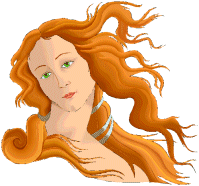

In [ ]:
## We can access the url of the image
from PIL import Image
from urllib.request import urlretrieve
import requests
from io import BytesIO


img_url= base_url + image["src"]
response = requests.get(img_url)

img = Image.open(BytesIO(response.content))
img

In [ ]:
# save image
img = img.save("aphrodite.gif")

In [ ]:
## Lets have another look at the content of aphrodite

url_aphrodite = "http://olympus.realpython.org/profiles/aphrodite"
page = urlopen(url_aphrodite)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

print(soup)

<html>
<head>
<title>Profile: Aphrodite</title>
</head>
<body bgcolor="yellow">
<center>
<br/><br/>
<img src="/static/aphrodite.gif"/>
<h2>Name: Aphrodite</h2>
<br/><br/>
Favorite animal: Dove
<br/><br/>
Favorite color: Red
<br/><br/>
Hometown: Mount Olympus
</center>
</body>
</html>



In [ ]:
## How do we access the content without TAGs?

#Favorite animal: Dove
#Favorite color: Red
#Hometown: Mount Olympus

#using the tag body() and get_text()

body = soup.find('body').get_text()
print(body)






Name: Aphrodite

Favorite animal: Dove

Favorite color: Red

Hometown: Mount Olympus




In [ ]:
## separate lines of the body into a list using the function split()
## in python '\n' means paragraph
body_lines = body.split('\n')
attribute_list = list(filter(lambda val: val !=  '', body_lines)) 


print(attribute_list)

['Name: Aphrodite', 'Favorite animal: Dove', 'Favorite color: Red', 'Hometown: Mount Olympus']


In [ ]:
## save the attributes of aphrodite into variables

list_of_attributes = []

for line in attribute_list:
  print(line)

  ## the next command splits the line into 2 components, before and after ':' - line.split(':')
  ## and obtains the 'key', i.e. the element after ':' - [1]
  ## it also gets rid of the space after ':' by starting the string on the second position - [1:]

  key = line.split(':')[1][1:]

  if 'Name' in line: name = key
  if 'animal' in line: animal = key
  if 'color' in line: color = key
  if 'Hometown' in line: home = key

list_of_attributes = [name, animal,color,home]
print(list_of_attributes)

Name: Aphrodite
Favorite animal: Dove
Favorite color: Red
Hometown: Mount Olympus
['Aphrodite', 'Dove', 'Red', 'Mount Olympus']


In [ ]:
## Now lets obtain the list of attributes of all characters listed in the base URL

attributes_all = []

## Again we open the base URL and create a soup we can read
url = "http://olympus.realpython.org/profiles"
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

## Now we iterate over ths subURLs
base_url = "http://olympus.realpython.org"
for link in soup.find_all("a"):
    subURL = base_url + link["href"]
    print(subURL)

    ## for each subURL we open a new subSoup s_soup
    s_page = urlopen(subURL)
    s_html = s_page.read().decode("utf-8")
    s_soup = BeautifulSoup(s_html, "html.parser")

    ## for each we obtain the list of attributes
    s_body = s_soup.find('body').get_text()
    s_body_lines = s_body.split('\n')
    s_attribute_list = list(filter(lambda val: val !=  '', s_body_lines)) 
    print(s_attribute_list)

    ## strip the attributes to the basic elements
    key_attr = []
    for line in s_attribute_list:
      key = line.split(':')[1][1:]
      key_attr +=[key]
    print(key_attr)

    ## add the attributes of each character to the list of all characters
    attributes_all += [key_attr]

print(attributes_all)

http://olympus.realpython.org/profiles/aphrodite
['Name: Aphrodite', 'Favorite animal: Dove', 'Favorite color: Red', 'Hometown: Mount Olympus']
['Aphrodite', 'Dove', 'Red', 'Mount Olympus']
http://olympus.realpython.org/profiles/poseidon
['Name: Poseidon', 'Favorite animal: Dolphin', 'Favorite color: Blue', 'Hometown: Sea']
['Poseidon', 'Dolphin', 'Blue', 'Sea']
http://olympus.realpython.org/profiles/dionysus
['Name: Dionysus', 'Hometown: Mount Olympus', 'Favorite animal: Leopard ', 'Favorite Color: Wine']
['Dionysus', 'Mount Olympus', 'Leopard ', 'Wine']
[['Aphrodite', 'Dove', 'Red', 'Mount Olympus'], ['Poseidon', 'Dolphin', 'Blue', 'Sea'], ['Dionysus', 'Mount Olympus', 'Leopard ', 'Wine']]


In [ ]:
## Create a dataframe with the information

import pandas as pd

df = pd.DataFrame(attributes_all,columns =['name','Favourite animal','Favourite colour','Hometown']) 
df


,name,Favourite animal,Favourite colour,Hometown
0,Aphrodite,Dove,Red,Mount Olympus
1,Poseidon,Dolphin,Blue,Sea
2,Dionysus,Mount Olympus,Leopard,Wine


In [ ]:
##Save it to a excel file
df.to_csv('greek_gods.csv', index=False, encoding='utf-8')